In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import datetime
import math
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from math import floor, ceil
from pylab import rcParams
%matplotlib inline

In [0]:
p = lambda x: f'/content/drive/My Drive/MLfinal/{x}'
iter_csv = pd.read_csv('/content/drive/My Drive/MLfinal/updated_train.csv', iterator=True, chunksize=100000)
train = pd.concat([chunk[chunk['1'] == 1] for chunk in iter_csv])
iter_csv = pd.read_csv('/content/drive/My Drive/MLfinal/updated_test.csv', iterator=True, chunksize=100000)
test = pd.concat([chunk[chunk['1'] == 1] for chunk in iter_csv])
#train = pd.read_csv(p('updated_train.csv')).loc[train['0'] == 1,]
#test = pd.read_csv(p('updated_test.csv')).loc[test['0'] == 1,]

In [0]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [0]:
train_labels = train.meter_reading
train_dataset = train.drop(columns=['meter_reading','1','2','3','0'])
test_labels = test.meter_reading
test_data = test.drop(columns = ['meter_reading','1','2','3','0'])

In [0]:
print(train_dataset.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)
print(test.shape)
print(train.shape)

(2782154, 35)
(2782154,)
(1391025, 35)
(1391025,)
(1391025, 40)
(2782154, 40)


In [0]:
# Define a simple sequential model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(100, input_dim=35, activation= "relu"),
    keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=['accuracy'])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 3,701
Trainable params: 3,701
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=['mean_squared_error','accuracy'])
#mean_squared_logarithmic_error;accuracy

In [0]:
# Fit Model
import time
import os
starttime = time.time()

checkpoint_path = "/content/drive/My Drive/training_1/cp1.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_dataset, 
          train_labels,  
          epochs=10,
          callbacks=[cp_callback])  # Pass callback to training

print(time.time() - starttime)
# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Train on 2782154 samples
Epoch 1/10
2781376/2782154 [============================>.] - ETA: 0s - loss: 64325330.4814 - mean_squared_error: 64325816.0000 - acc: 0.0080
Epoch 00001: saving model to /content/drive/My Drive/training_1/cp1.ckpt
2782154/2782154 [==============================] - 180s 65us/sample - loss: 64307602.2430 - mean_squared_error: 64308080.0000 - acc: 0.0080
Epoch 2/10
2781568/2782154 [============================>.] - ETA: 0s - loss: 64103572.4885 - mean_squared_error: 64104824.0000 - acc: 0.0011
Epoch 00002: saving model to /content/drive/My Drive/training_1/cp1.ckpt
2782154/2782154 [==============================] - 177s 64us/sample - loss: 64090283.6043 - mean_squared_error: 64091528.0000 - acc: 0.0011
Epoch 3/10
2781728/2782154 [============================>.] - ETA: 0s - loss: 64065337.9918 - mean_squared_error: 64066492.0000 - acc: 0.0029
Epoch 00003: saving model to /content/drive/My Drive/training_1/cp1.ckpt
2782154/2782154 [==============================] -

In [0]:
loss, mae, mse = model.evaluate(test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

1391025/1391025 - 50s - loss: 63167067.4062 - mean_squared_error: 63162140.0000 - acc: 0.0073
Testing set Mean Abs Error: 63162140.00 MPG


In [0]:
test_predictions = model.predict(test_data).flatten()

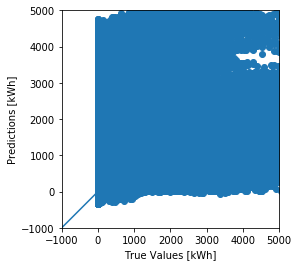

In [0]:


a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [kWh]')
plt.ylabel('Predictions [kWh]')
lims = [-1000, 5000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)